In [1]:
############   IMPORTS AND CONFIG   ############   

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli
import pandas as pd
import random
import scipy
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
tf.__version__

# prettier Matplotlib.
import matplotlib.style as style
style.use('ggplot') #sets the size of the charts
#plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

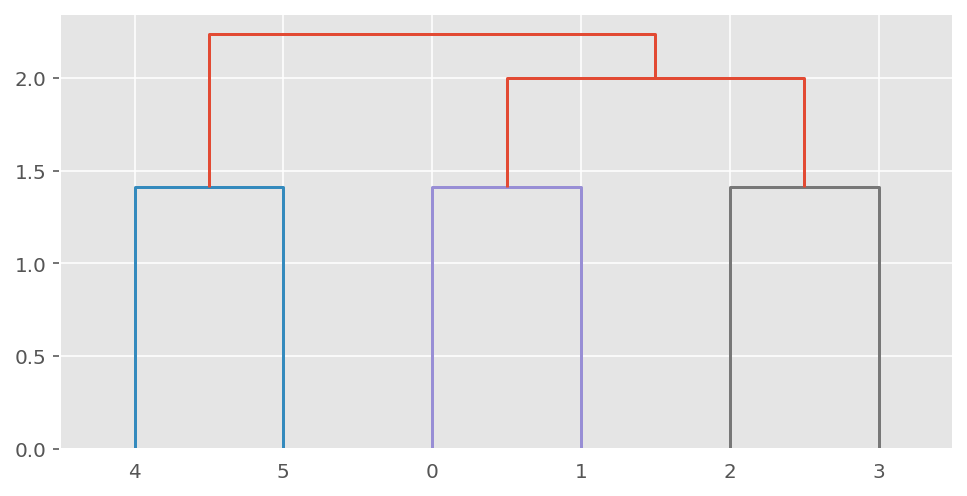

In [2]:
NUM_ITEMS = 6
NUM_FEATURES =  13

features = ['Grow', 'Move', 'Roots', 'Milk', 'Feathers', 'Hands', 'Mane', 'Fly', 'Waddle', 'Pretty', 'Hardwood']
items = ['Gorilla', 'Lion', 'Canary', 'Penguin','Oak', 'Rose']
#dimensions = ['Base', 'Animal-Plant', 'Mammal-Bird', 'Ape']
train_input = np.identity(NUM_ITEMS)
train_output = np.array([[1, 1, 1, 1, 1, 1], #grow
                         [1, 1, 1, 1, 0, 0], #move
                         [0, 0, 0, 0, 1, 1], #roots
                         [1, 1, 0, 0, 0, 0], #milk
                         [0, 0, 1, 1, 0, 0], #feathers
                         [0, 0, 0, 0, 1, 0], #hardwood
                         [0, 0, 0, 0, 0, 1], #pretty
                         [1, 0, 0, 0, 0, 0], #hands
                         [0, 1, 0, 0, 0, 0], #mane
                         [0, 0, 1, 0, 0, 0], #fly
                         [0, 0, 0, 1, 0, 0]]) #waddle
train_output = train_output.astype('int64')
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
Z = linkage(train_output.T, method = 'single', metric = 'euclidean')
fig = plt.figure(figsize=(8, 4))
dn = dendrogram(Z, distance_sort= True, leaf_font_size = 10)

[3.482 1.969 1.732 1.    1.    1.   ]


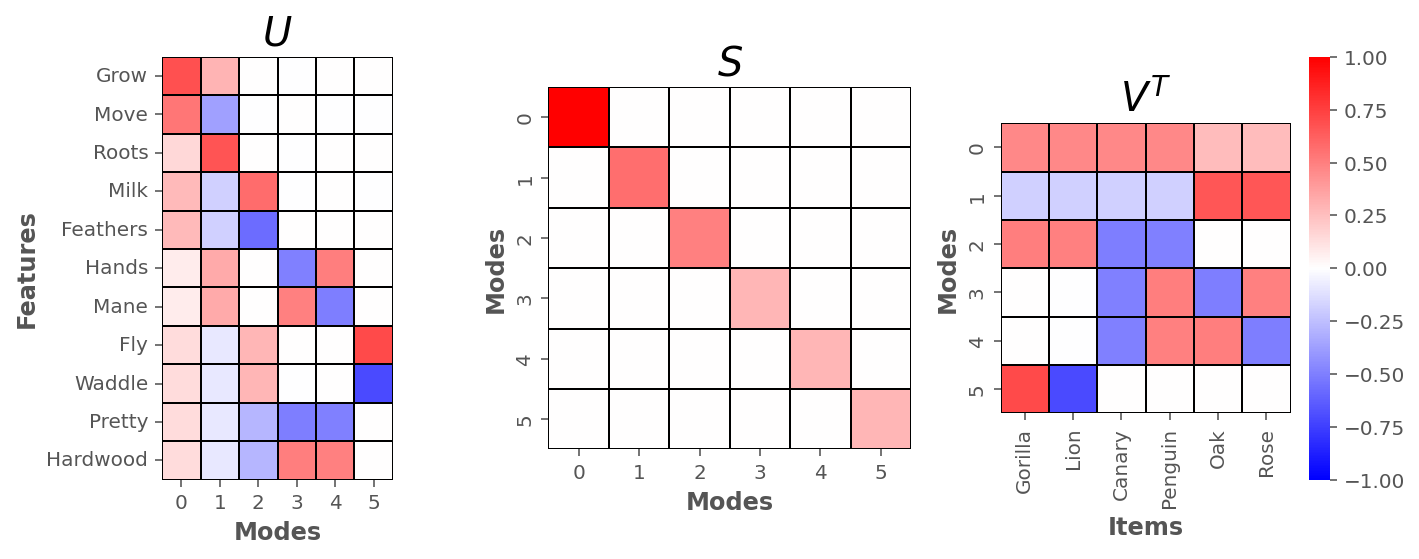

In [15]:
sigma_31 = train_output @ train_input.T 
u,s,v_T = scipy.linalg.svd(sigma_31, full_matrices= False, lapack_driver = 'gesvd')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,4))
sns.heatmap(-u, cmap = 'bwr', vmin = -1, vmax = 1, square = True, cbar = False, linewidths = 1, linecolor = 'black', annot = False,fmt = '.2f', ax = axes[0], yticklabels = features)
sns.heatmap(np.diag(s), cmap = 'bwr', square = True, vmin = 0, cbar = False, linewidths = 1, linecolor = 'black', annot = False,fmt = '.2f',  ax = axes[1], center = 0)
sns.heatmap(-v_T, cmap = 'bwr', vmin = -1, vmax = 1, square = True, cbar = True, linewidths = 1, linecolor = 'black', annot = False,fmt = '.2f', ax = axes[2], xticklabels=items)

axes[0].set_ylabel('Features', weight = 'bold')
axes[0].set_xlabel('Modes', weight = 'bold')
axes[0].set_title('$U$', weight = 'bold', fontsize = 20)
            
axes[1].set_ylabel('Modes', weight = 'bold')
axes[1].set_xlabel('Modes', weight = 'bold')
axes[1].set_title('$S$', weight = 'bold', fontsize = 20)

axes[2].set_ylabel('Modes', weight = 'bold')
axes[2].set_xlabel('Items', weight = 'bold')
axes[2].set_title('$V^T$', weight = 'bold', fontsize = 20)

fig.tight_layout()
plt.savefig('unbsvd.pdf', bbox_inches = 'tight', pad_inches = 0)
print(s)


### changing u, v ####

plt.tight_layout()
